<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Загрузить датасет по url:


In [3]:
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


### Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom ###

**Выбросы** - первым делом

In [5]:
# Проверяем, есть ли пустые ячейки
df.Freedom.isnull().sum()

1

In [6]:
# Находим пустую ячейку

df.sort_values('Freedom').tail(1)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [7]:
# удаляем "лишнюю" строку
df = df.drop(df[df['Country (region)'] == 'Qatar'].index)

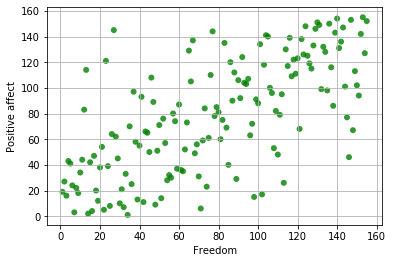

In [8]:
# проверяем на экстремальные значения

freedom = df['Freedom']
positive_affect = df['Positive affect']

fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='green', alpha=0.8, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.show()

In [9]:
# Бангладеш можно оставить
df[
    (df['Freedom'] < 30) &
(df['Positive affect'] > 140)
].head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
124,Bangladesh,125,52,145.0,68.0,126.0,27.0,36.0,107.0,119.0,90.0


**Мат.ожидание**

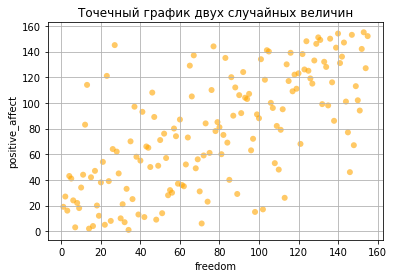

In [10]:
freedom = df['Freedom']
positive_affect = df['Positive affect']
fig, ax = plt.subplots()
ax.scatter(freedom, positive_affect, c='orange', alpha=0.6, edgecolors='none')

ax.grid(True)
plt.xlabel('freedom')
plt.ylabel('positive_affect')
plt.title('Точечный график двух случайных величин')
plt.show()

**Медиана, мода, стандартное отклонение, дисперсия, минимум и максимум, размах для колонки Freedom**

In [11]:
print('Медиана:', statistics.median(df.Freedom))

Медиана: 78.0


In [12]:
print('Мода:', statistics.mode(df.Freedom))

StatisticsError: no unique mode; found 155 equally common values

**Почему нельзя найти моду?**

In [13]:
#Все значения индекса cчастья - уникальны, встречаются один раз.
# что логично, если индекс свободы - ранговая переменная.

df.Freedom.value_counts().sort_values().head(3)

154.0    1
120.0    1
155.0    1
Name: Freedom, dtype: int64

In [14]:
print('Стандартное отклонение:', statistics.pstdev(df.Freedom))

Стандартное отклонение: 44.74371464239419


In [15]:
print('Дисперсия:', statistics.pvariance(df.Freedom))

Дисперсия: 2002.0


In [16]:
print('Минимум:', min(df.Freedom))

Минимум: 1.0


In [17]:
print('Максимум:', max(df.Freedom))

Максимум: 155.0


In [18]:
print('Размах:', max(df.Freedom) - min(df.Freedom))

Размах: 154.0


### Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение? ###

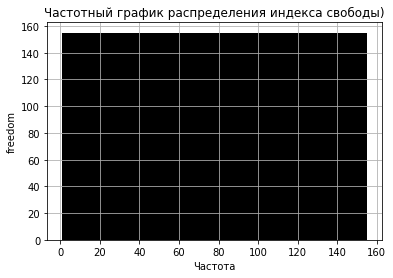

In [19]:
n, bins, patches = plt.hist(df.Freedom, 1, facecolor='k')


plt.xlabel('Частота')
plt.ylabel('freedom')
plt.title('Частотный график распределения индекса свободы)')
plt.grid(True)
plt.show()

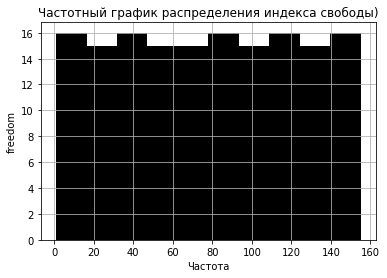

In [20]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='k')


plt.xlabel('Частота')
plt.ylabel('freedom')
plt.title('Частотный график распределения индекса свободы)')
plt.grid(True)
plt.show()

**В обоих случаях - равномерное распределение.**

### Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента? ###

Коэффициент корреляции Пирсона: 0.6817698430601657


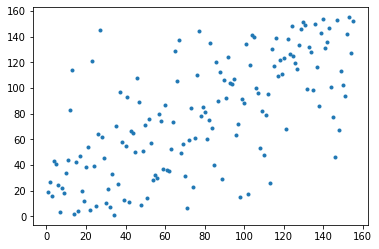

In [21]:
freedom = df['Freedom']
positive_affect = df['Positive affect']

from scipy.stats import pearsonr
x = freedom
y = positive_affect
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)


In [22]:
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

0.6817698430601657


***Коэффициент Пирсона больше нуля, соответственно, корреляция положительная***

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [23]:
freedom = df.Freedom
freedom_1 = freedom - statistics.mean(freedom)
statistics.mean(freedom_1)

0.0

In [24]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))

### Построить матрицу корреляций для всех колонок таблицы ###

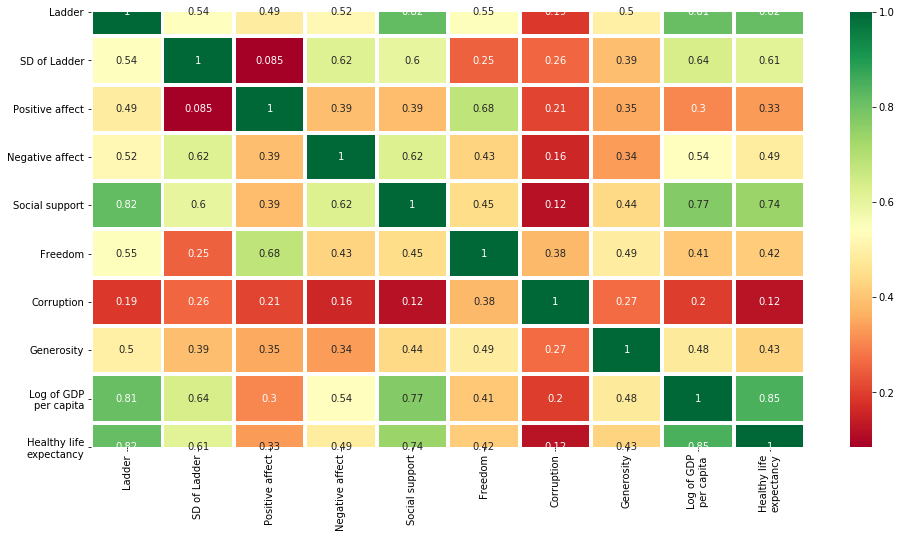

In [25]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=3.0)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

## Загрузить таблицу цен на авокадо:##

In [26]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df_2=pd.read_csv(url)
df_2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

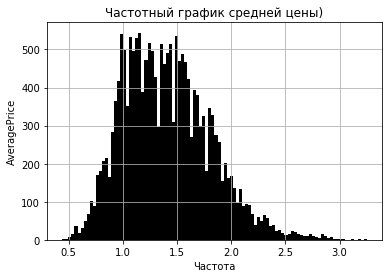

In [28]:
n, bins, patches = plt.hist(df_2.AveragePrice, 100, facecolor='k')


plt.xlabel('Частота')
plt.ylabel('AveragePrice')
plt.title('Частотный график средней цены)')
plt.grid(True)
plt.show()

**Нормальное распределение**

#### Найти корреляцию в следующих колонках: ####

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [29]:
df_new = df_2[['AveragePrice', '4046', '4225', '4770']]

In [30]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df_new[['AveragePrice', '4046', '4225', '4770']])

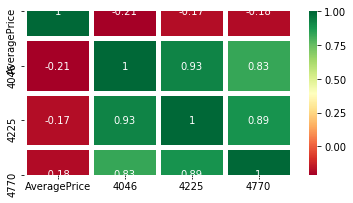

In [31]:
import seaborn as sns
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=4.0)
fig=plt.gcf()
fig.set_size_inches(6,3)
plt.show()

Коэффициент корреляции Пирсона: -0.2083170484878848


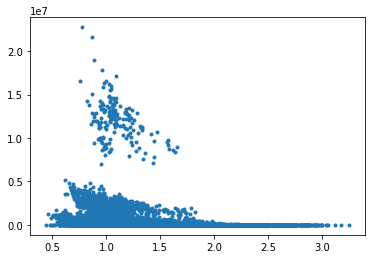

In [32]:
from scipy.stats import pearsonr
x = df_new.AveragePrice
y = df_new['4046']
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.1729277725093354


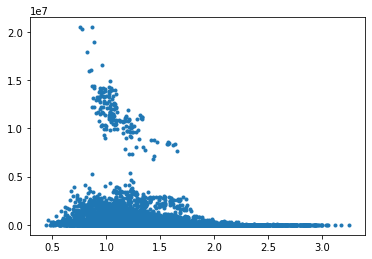

In [33]:
from scipy.stats import pearsonr
x = df_new.AveragePrice
y = df_new['4225']
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.17944598397975622


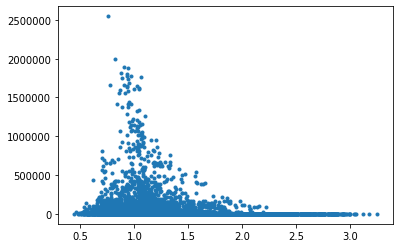

In [34]:
from scipy.stats import pearsonr
x = df_new.AveragePrice
y = df_new['4770']
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

**Вывод:**
Матрица корреляций показывает значимые положительные взаимосвязи между ценами на авокадо типов всех трех типов (4046, 4225, 4770) между собой.
Со средней ценой, наоборот, взаимосвязь отрицательна и слабее. Т.е. при повышении цен на конкретные сорта, средняя цена падает.
Зависимость не похожа на линейную, коэффициент Спирмена дает более значимую отрицательную взаимосвязь.
Сама отрицательная корреляция может отражать сезонные колебания, когда одних сортов становится меньше и они дорожают, но на рынке появляются другие, более дешевые сорта и средняя цена падает.


In [35]:
print('4046')
coef, p = sts.spearmanr(df_new['AveragePrice'], df_new['4046'])
print('Коэффициент Спирмена: %.3f' % coef)

coef, p = sts.kendalltau(df_new['AveragePrice'], df_new['4046'])
print('Коэффициент Кендалла: %.3f' % coef)

4046
Коэффициент Спирмена: -0.596
Коэффициент Кендалла: -0.417


In [36]:
print('4225')

coef, p = sts.spearmanr(df_new['AveragePrice'], df_new['4225'])
print('Коэффициент Спирмена: %.3f' % coef)

coef, p = sts.kendalltau(df_new['AveragePrice'], df_new['4225'])
print('Коэффициент Кендалла: %.3f' % coef)

4225
Коэффициент Спирмена: -0.514
Коэффициент Кендалла: -0.344


In [37]:
print('4770')
coef, p = sts.spearmanr(df_new['AveragePrice'], df_new['4770'])
print('Коэффициент Спирмена: %.3f' % coef)

coef, p = sts.kendalltau(df_new['AveragePrice'], df_new['4770'])
print('Коэффициент Кендалла: %.3f' % coef)

4770
Коэффициент Спирмена: -0.533
Коэффициент Кендалла: -0.375
